# Decision Trees

Decision trees are a machine learning model that iteratively partition a dataset into increasingly homogeneous subsets. Partitions are made via a brute force search across all the available parameters and all represented values of those parameters. This search finds the value that optimizes a numeric measure of homogeniety. The most common metrics used for choosing the split points are:

1. Gini Index (for classification)
2. Entropy (also for classification)
3. Mean squared error relative to the mean (for regression)
4. Mean absolute error relative to the mean (for regression)

The key intuition for these models is this:

* For classification, each split attempts to consoledate datapoints of the same class into separate notes (increasing each nodes homogeniety).
* For regression, each split attempts to reduce the variance of the datapoints in that node with respect to the target variable. 

Using hyperparameters we can control how many splits are made in a variety of direct and indirect ways. Two examples: limiting the maximum depth of the tree and not splitting nodes with fewer than N datapoints. 

Once the tree is built we use it by applying the split points to our unseen data until we arrive at a leaf node. For classification, whichever class is most prevelant at the leaf node determines our prediction, for regresssion the mean of the datapoints with repect to the target value is used.

**Instructor: work through an example of a DT Classifier on the whiteboard with two dimensions. Show both the "tree" view and the "graph" view so that we can discusss the "decision boundary" and its boxyness.**

(Lets go to the whiteboard, if you're self learning [watch this video](https://www.youtube.com/watch?v=LDRbO9a6XPU) on youtube instead.)

In [14]:
# Lets look at an example using our UCI-heart dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the data
heart_dataset = pd.read_csv('../../datasets/uci-heart-disease/heart.csv')

# Split the data into input and labels
labels = heart_dataset['target']
input_data = heart_dataset.drop(columns=['target'])

# Split the data into training and test
training_data, test_data, training_labels, test_labels = train_test_split(
    input_data, 
    labels, 
    test_size=0.20
)

model = DecisionTreeClassifier()
model.fit(training_data, training_labels)
model.score(test_data, test_labels)

0.7540983606557377

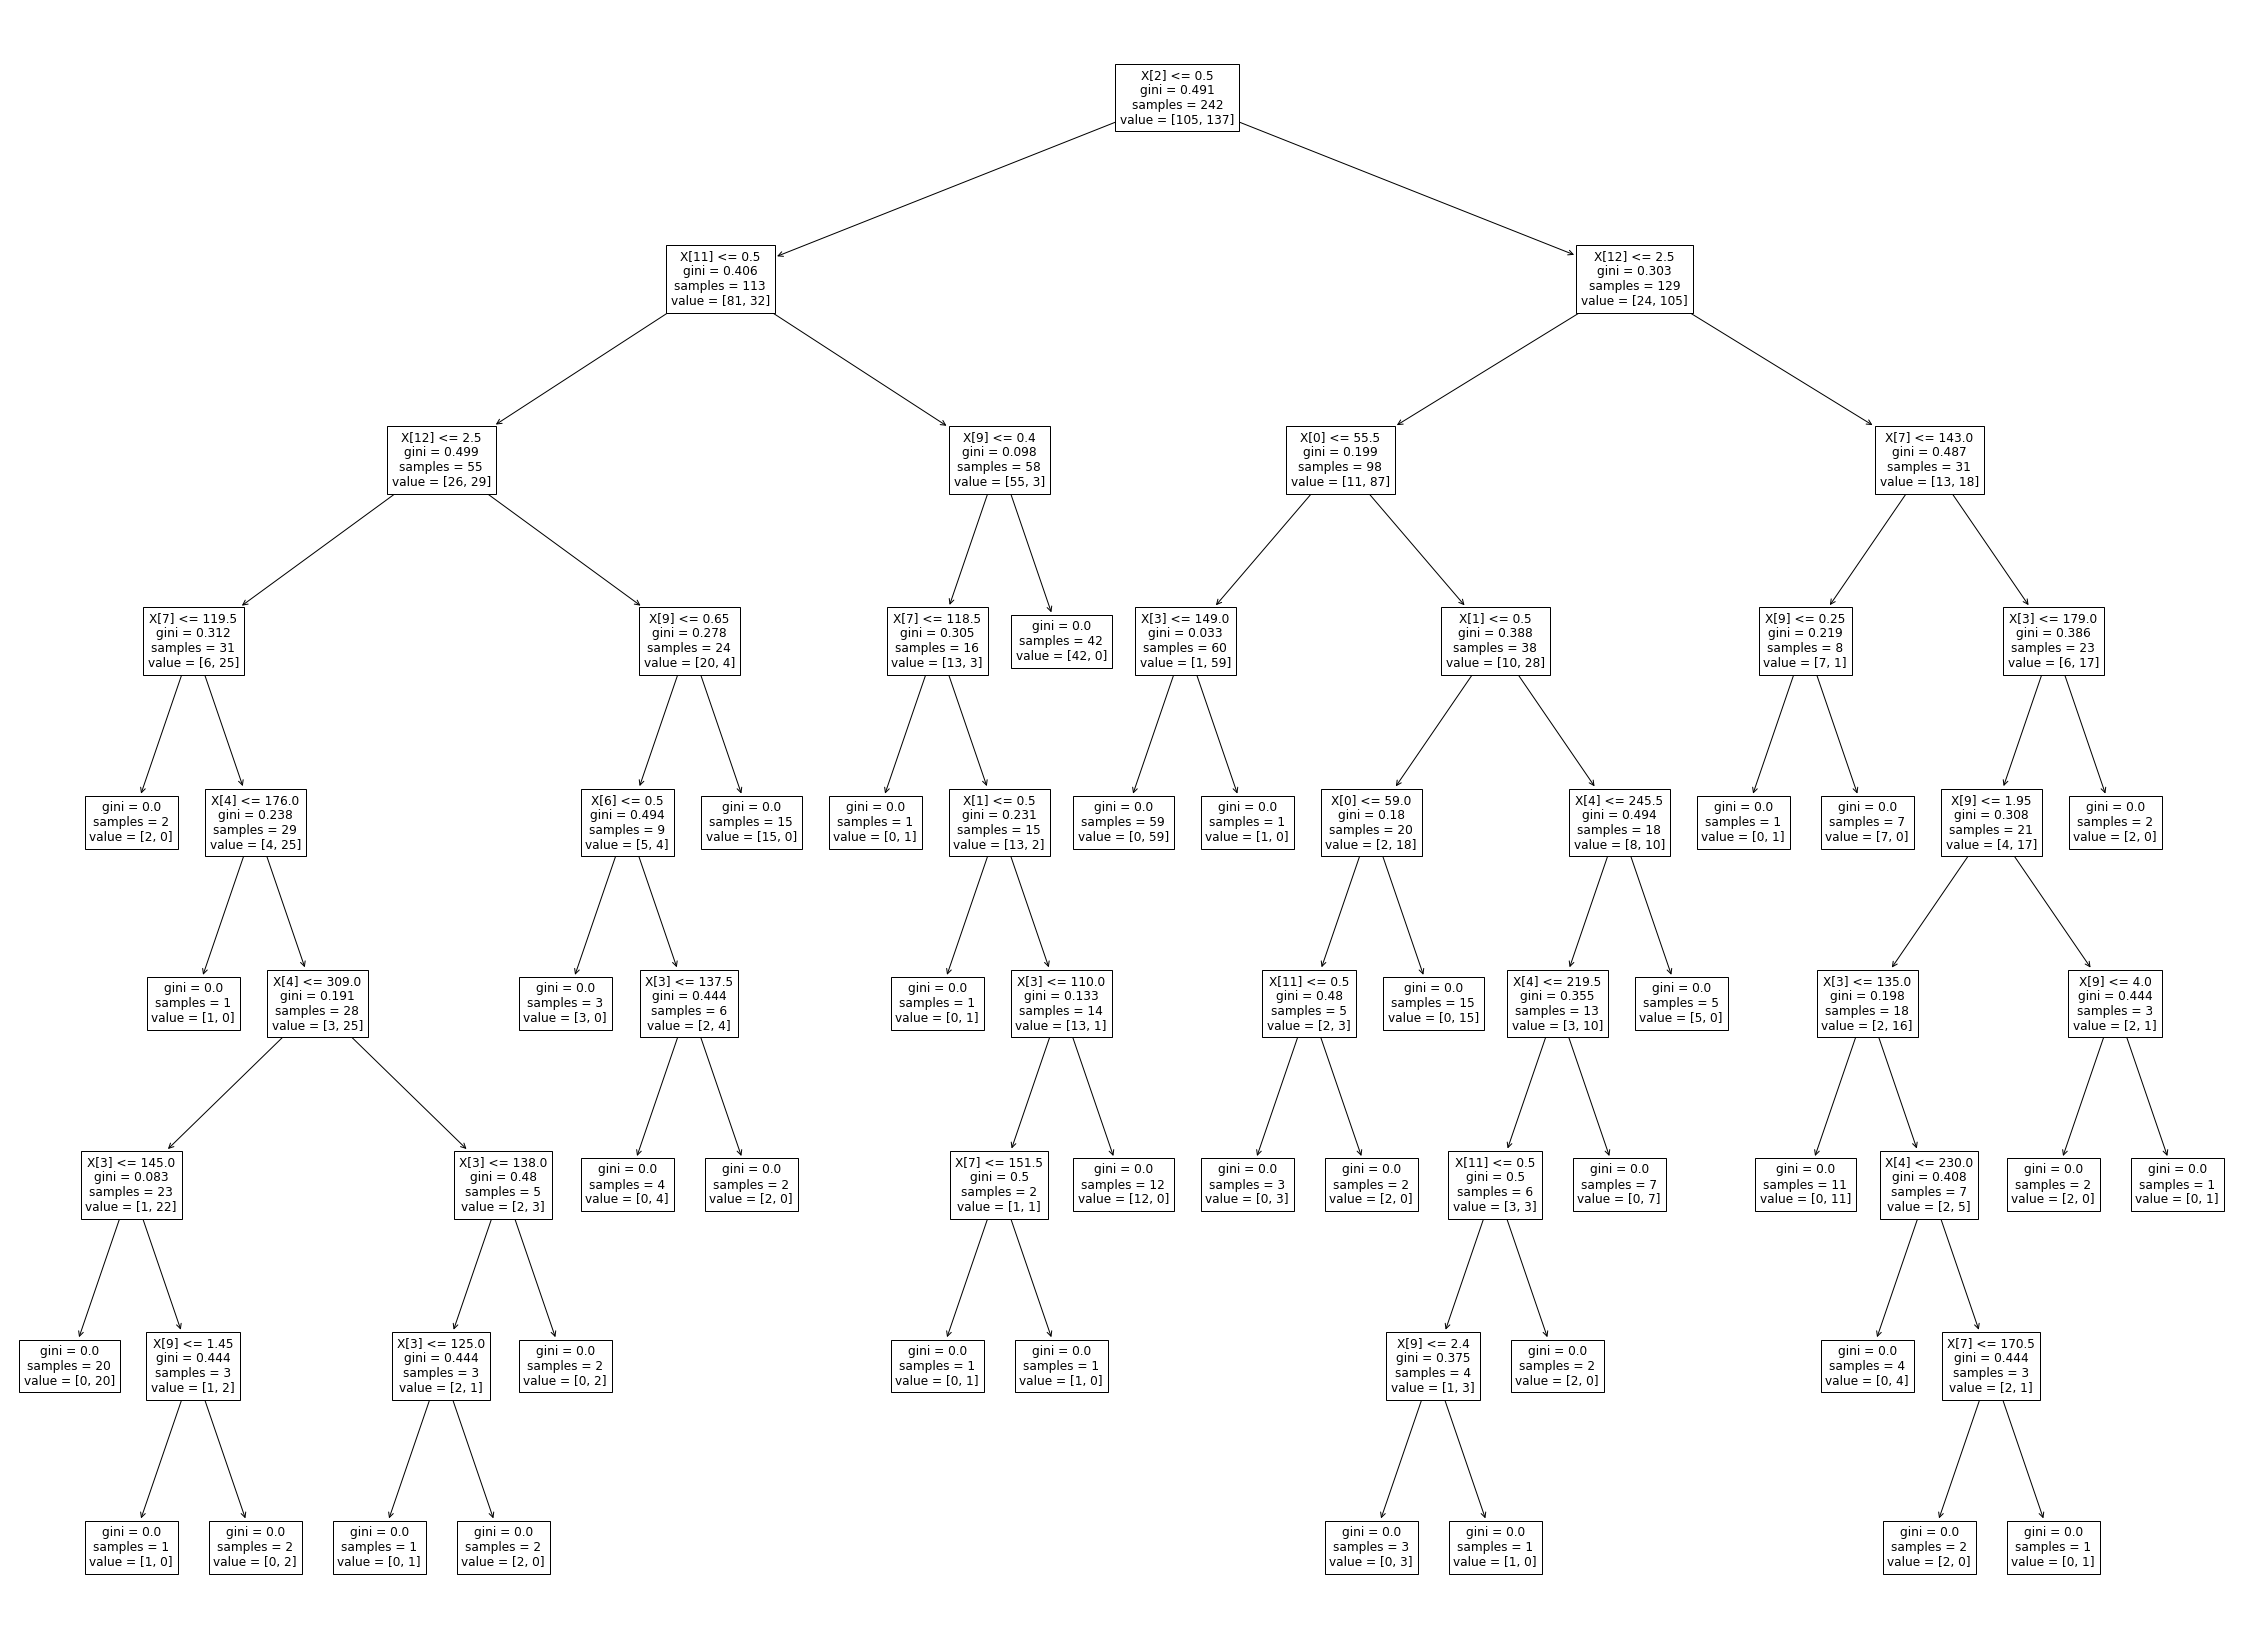

In [18]:
# 75% accuracy with a completely default model is not so bad.

# One of the nice things about the DT model is that it's very interpretable.
# We can even look at the tree itself for our trained tree...
plt.figure(figsize=(40,30))
plot_tree(model)
plt.show()



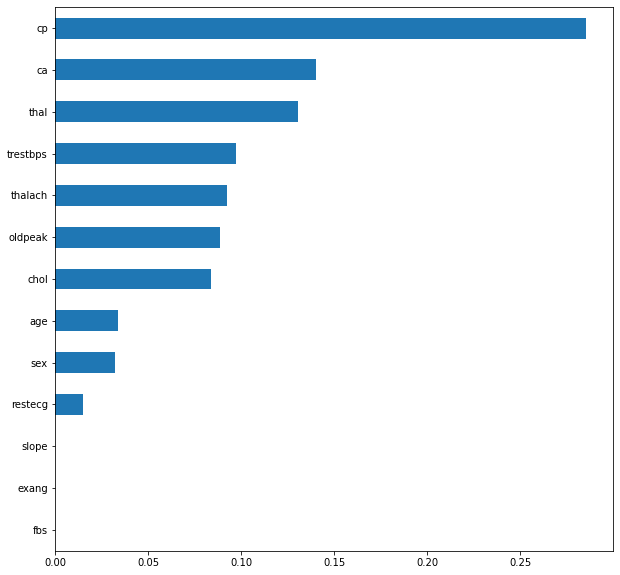

In [22]:
# Because of the way the model works, we can also determine which features were important
# By computing the total amount of information gained from splitting on a per-feature basis.
# The "most important feature" is the one whose splits most increased homogeniety during training.

feat_importances = pd.Series(model.feature_importances_, index=training_data.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,10))


# Regression

The decision tree model can also be used for regression. The process for building one is very similar with the main difference being the metric used for splts, typically MSE from the mean (per node) instead of Gini/Entropy.

In [34]:
from sklearn.tree import DecisionTreeRegressor

# Load the data
fish_dataset = pd.read_csv('../../datasets/fish/Fish.csv')

# Split the data into input and labels — we're trying to predict fish weight based on 
# its size and species
labels = fish_dataset['Weight']
input_data = fish_dataset.drop(columns=['Weight'])

# We have one categorical parameter, so lets tell pandas to one-hot encode this value.
input_data = pd.get_dummies(input_data, columns=['Species'])

# Just in case you haven't seen get_dummies / one-hot encoding
# lets look at what happened here, note the "species" column is gone
# replaced with seven binary (1,0) columns indicating which species
# each fish is. The first 5 values shown here are all "Bream"
input_data.head()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [35]:
# Split the data into training and test
training_data, test_data, training_labels, test_labels = train_test_split(
    input_data, 
    labels, 
    test_size=0.20
)

model = DecisionTreeRegressor()
model.fit(training_data, training_labels)
model.score(test_data, test_labels)

0.9400530954836682

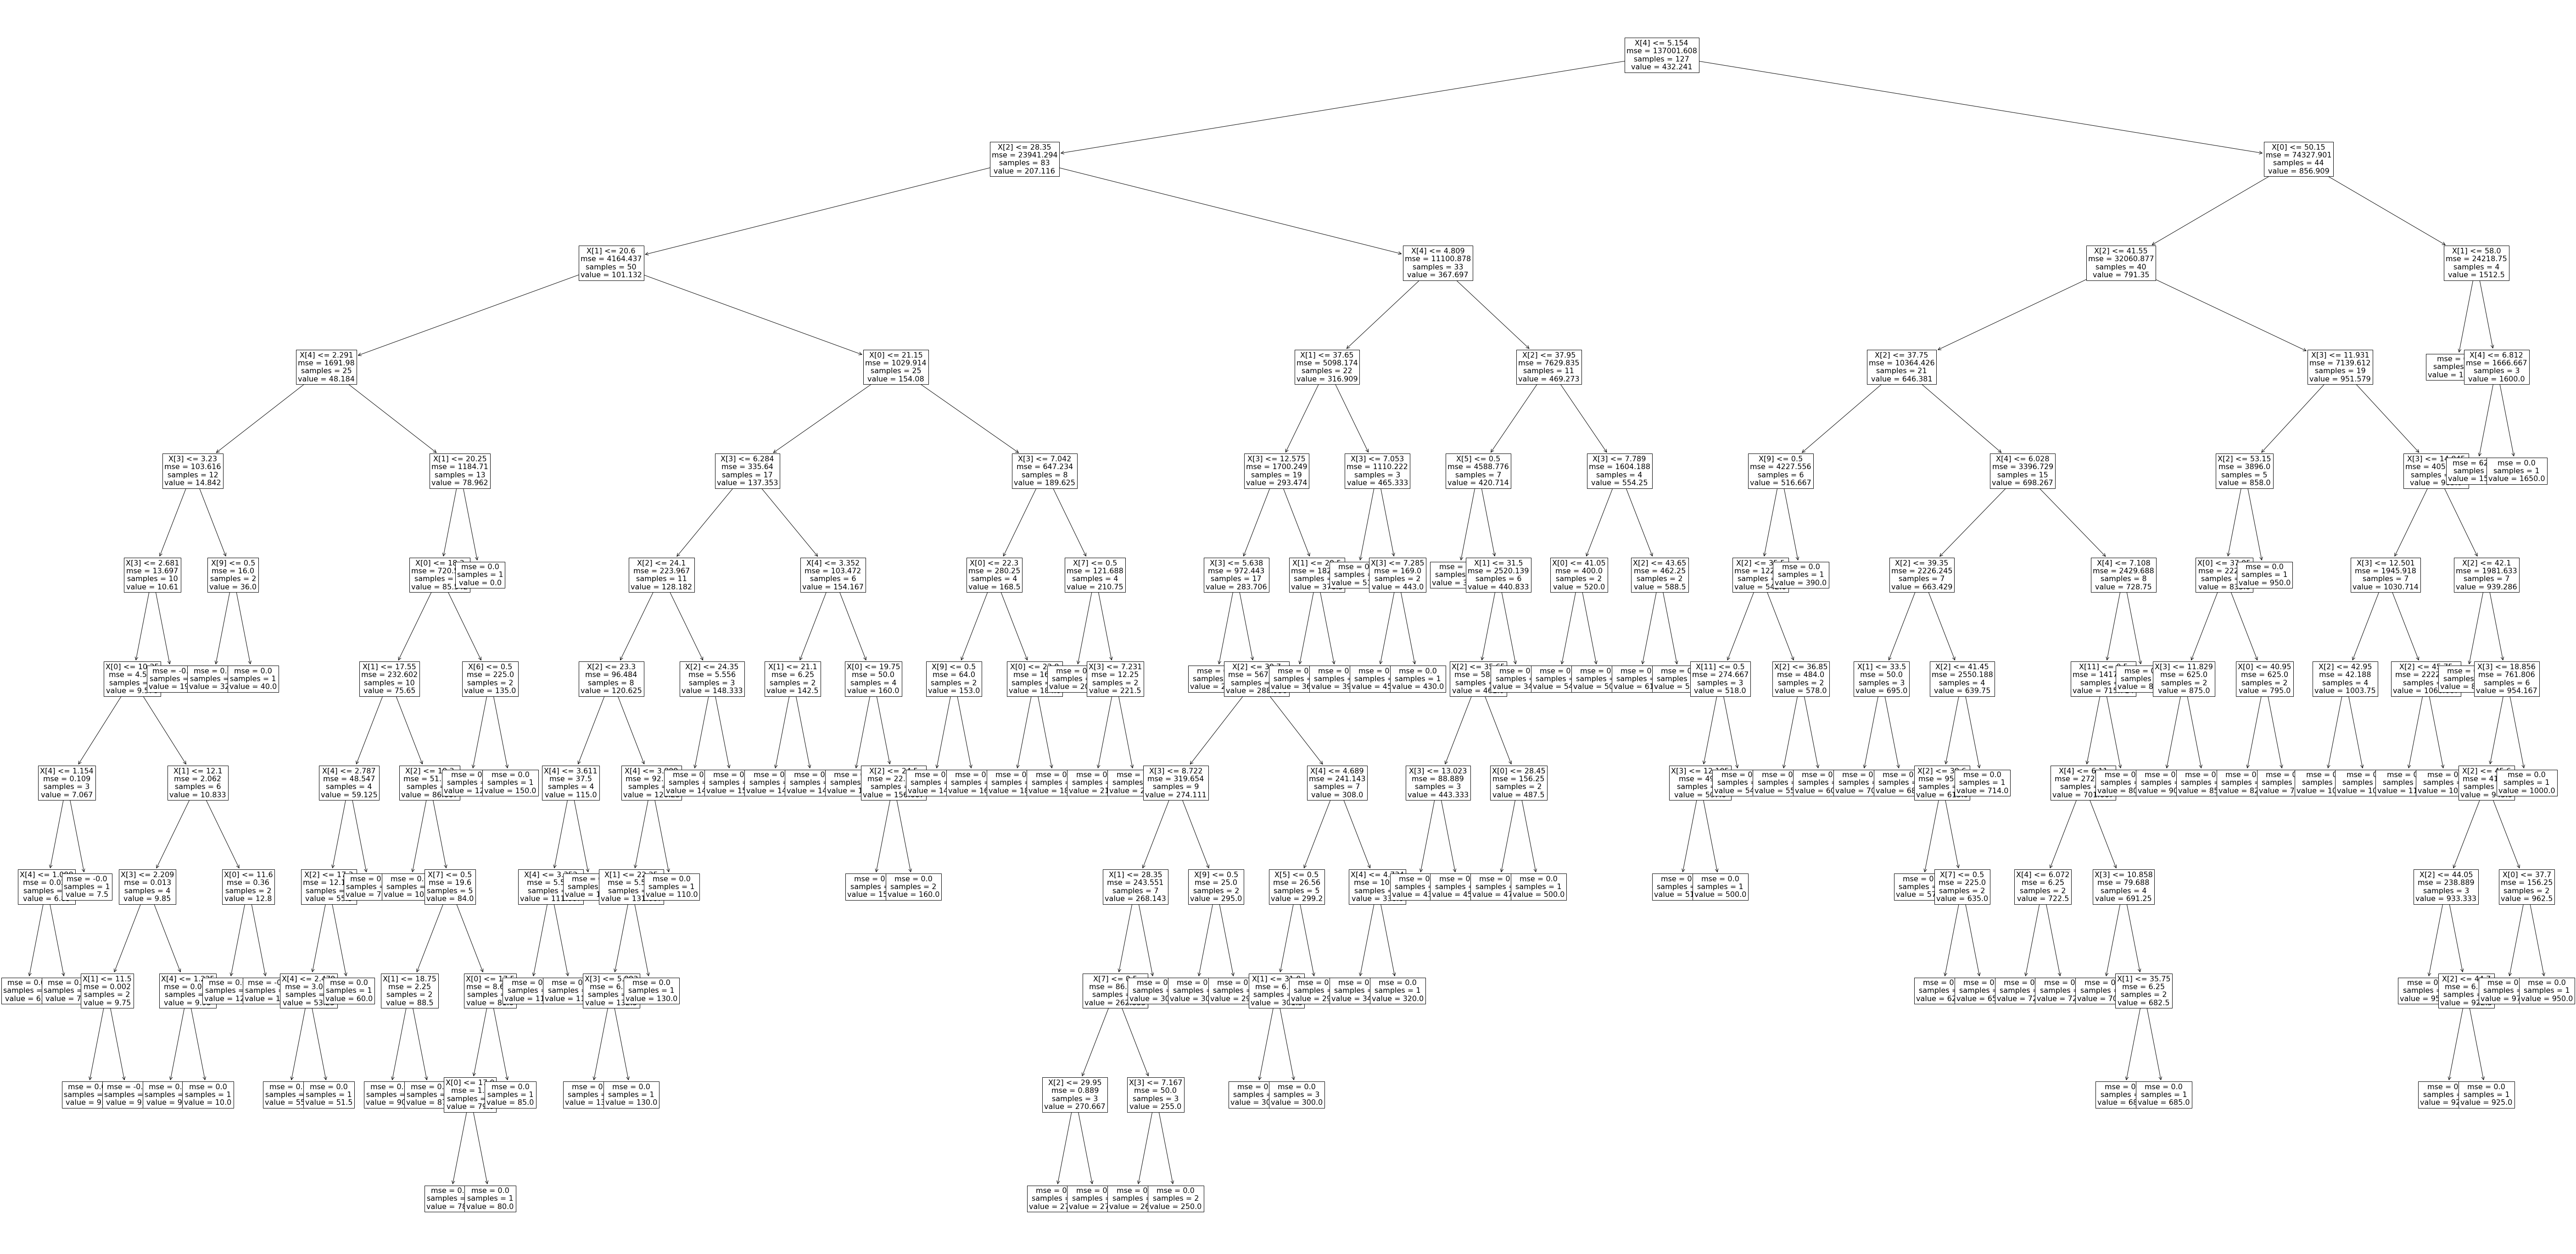

In [40]:
# 94 is not percent accuracy, rather it is the R^2 value based on our predictions for test_data. 
# This is very good, but that isn't super surprising since the geometric size of a fish ought to be
# highly predictive of its weight...

# We can also generate the graph and feature importances for regression trees
plt.figure(figsize=(100,50))
plot_tree(model, fontsize=16)
plt.show()

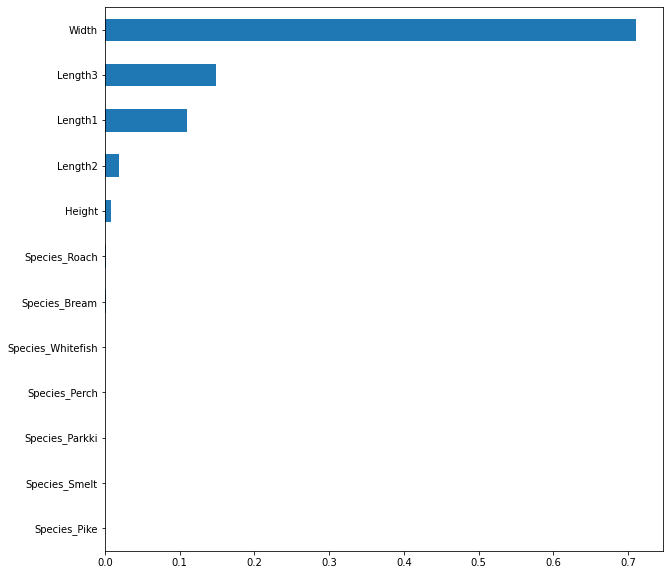

In [37]:
feat_importances = pd.Series(model.feature_importances_, index=training_data.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,10))

In [ ]:
# note that the species of fish was essentailly irrelevant to its weight. Interesting.

# It might be more interesting to use this dataset as a classifier to predict fish species...